In [27]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import  combinations_with_replacement
import math
from mpl_toolkits.mplot3d import Axes3D
import random
import pandas as pd
%matplotlib inline

In [28]:
def length_of_design_matrix(m,d):
    # print(m,d)
    # print((math.factorial(m+d))/(math.factorial(m)*math.factorial(d)))
    return (math.factorial(m+d))/(math.factorial(m)*math.factorial(d))

In [29]:
def generate(m,data_point):
    lst = []
    for i in range(m+1):
        combination = combinations_with_replacement(data_point,i)
        s = [np.prod(comb) for comb in combination]
        lst = lst + s
    return lst

In [30]:
generate(3,[2.])

[1.0, 2.0, 4.0, 8.0]

In [31]:
def design_matrix(n,m,D,Data_points):
    # print(n,D)
    basis_func = np.zeros((n,D),dtype=np.float64)
    # print(basis_func)
    for i in range(n):
        # print(generate(m,Data_points[i]))
        basis_func[i] = generate(m,Data_points[i])
    return basis_func

In [32]:
def predict(weights,x,m):
    # print(len(generate(m,x)))
    # print(weights.shape)
    # print(np.transpose(weights).shape)
    z = np.array(generate(m,x))
    z = z.reshape(-1,1)
    weights = (np.array(weights)).reshape(-1,1)
    # print(weights.shape)
    # print(z.shape)
    x = np.transpose(z) @ weights
    # print("for ",np.transpose(z)," and ",weights)
    
    # print("x is ",x)
    return x[0][0]

In [33]:
def model(target,Data,m,D,Data_size,l):
    # print("D in model is ",D)
    basis_func = design_matrix(Data_size,m,D,Data)
    # print(l)
    x = np.linalg.inv((np.transpose(basis_func)@basis_func) + l*np.identity(D))
    # print(x)
    weights = x @ np.transpose(basis_func) @ np.transpose(target)
    return weights

In [34]:
print(4*np.identity(5))

[[4. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 4.]]


In [35]:
def error_rms(predicted, expected):
    
    x = [((predicted[i] - expected[i]) ** 2) for i in range(len(predicted))]
    
    return (np.mean(x)) ** 0.5

In [36]:
def ErmsReg(predicted,expected,l,weights):
    
    weights = (np.array(weights)).reshape(-1,1)
    arr = np.transpose(weights)@weights
    a = l*arr[0][0]
    x = 0.0
    for i in range(len(predicted)):
        x = x+ ((predicted[i]-expected[i])**2)
    x = x+a
    x = x/2
    return x

In [43]:
############# DATA SET 1 ###################
df = pd.read_csv('team10/dataset1/train_1b.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['X']])
    target.append(row['y'])# Convert the Series to a list and append it to 'data'

df = pd.read_csv('team10/dataset1/test.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['X']])
    target_test.append(row['y'])

df = pd.read_csv('team10/dataset1/validation.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['X']])
    target_valid.append(row['y'])


m with least Erms for validation data is  3


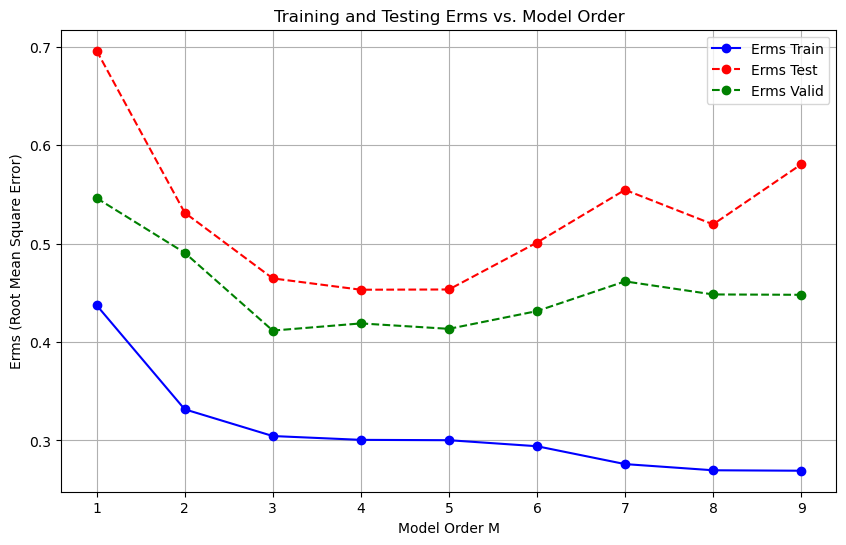

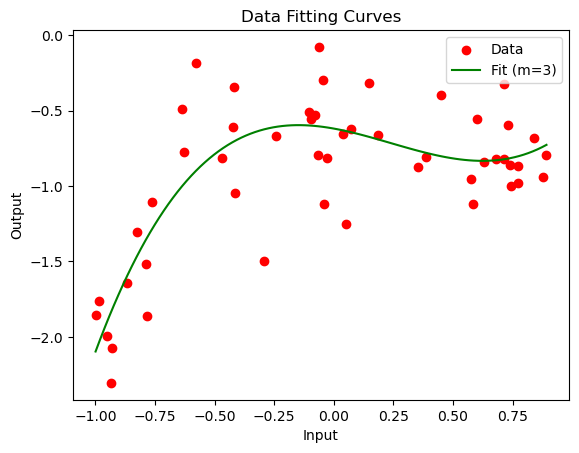

In [44]:
########################## Plot for Data Set 1 #######################################
###################################   Error Plot for various values of M ################################
l= 0
maxm = 10
Erms_train = []
Erms_test = []
Erms_valid = []
Data_size = len(data)
for m in range(1,maxm):
    D=int(length_of_design_matrix(m,len(data[0])))
    # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    act = []
    for x in data:
        act.append(predict(weightsi,x,m))
    act_test =[]
    for x in data_test:
        act_test.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    Erms_test.append(error_rms(act_test,target_test))
    Erms_train.append(error_rms(act,target))
    Erms_valid.append(error_rms(act_valid,target_valid))

model_orders = list(range(1,maxm))
nms = len(model_orders)
    # Create the plot
i=0
for j in range(1,nms):
    if Erms_valid[j]<Erms_valid[i]:
        i=j
print("m with least Erms for validation data is ",model_orders[i])
plt.figure(figsize=(10, 6))
plt.plot(model_orders, Erms_train, marker='o', linestyle='-', color='b', label='Erms Train')
plt.plot(model_orders, Erms_test, marker='o', linestyle='--', color='r', label='Erms Test')
plt.plot(model_orders, Erms_valid, marker='o', linestyle='--', color='g', label='Erms Valid')

    # Add labels and title
plt.xlabel('Model Order M')
plt.ylabel('Erms (Root Mean Square Error)')
plt.title('Training and Testing Erms vs. Model Order')
plt.legend()
plt.grid(True)

    # Show the plot
plt.show()
minm = model_orders[i]

D=int(length_of_design_matrix(minm,len(data[0])))
    # print(D)
weightsi = model(target,data,minm,D,len(data),l)
ouput_test = []
for x in data_test:
    ouput_test.append(predict(weightsi,x,minm))


flattened_data = np.concatenate(data)
x_fit = np.linspace(min(flattened_data), max(flattened_data), 100) 
y_fit = [predict(weightsi,[x],minm) for x in x_fit]
plt.scatter(data, target, color='red', label='Data')
plt.plot(x_fit, y_fit,linestyle='-', color='g',label=f'Fit (m={minm})')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Data Fitting Curves')
plt.show()


In [48]:
############ DATA SET 2 ###################
df = pd.read_csv('team10/dataset2/Train-2b-100.csv')
data = []
target = []
for index, row in df.iterrows():
    data.append([row['x1'],row['x2']])
    target.append(row['output'])# Convert the Series to a list and append it to 'data'

df = pd.read_csv('team10/dataset2/Test-50.csv')
data_test = []
target_test = []
for index, row in df.iterrows():
    data_test.append([row['x1'],row['x2']])
    target_test.append(row['output'])

df = pd.read_csv('team10/dataset2/Val-50.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    data_valid.append([row['x1'],row['x2']])
    target_valid.append(row['output'])

m with least Erms for validation data is  5


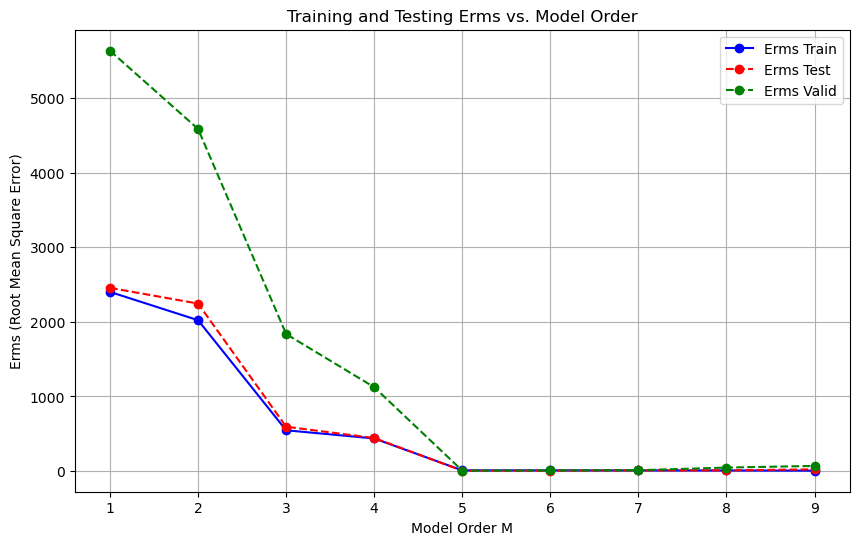

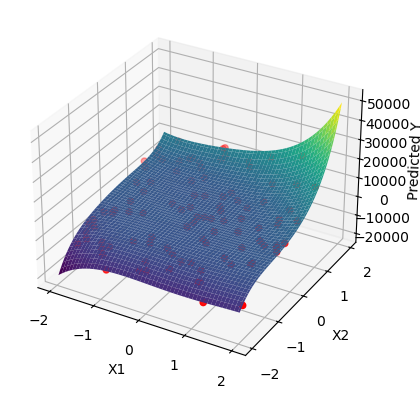

In [49]:
############# Plot for Data Set 2 ###############
l= 0
maxm = 10
Erms_train = []
Erms_test = []
Erms_valid = []
Data_size = len(data)
for m in range(1,maxm):
    D=int(length_of_design_matrix(m,len(data[0])))
    # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    act = []
    for x in data:
        act.append(predict(weightsi,x,m))
    act_test =[]
    for x in data_test:
        act_test.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    Erms_test.append(error_rms(act_test,target_test))
    Erms_train.append(error_rms(act,target))
    Erms_valid.append(error_rms(act_valid,target_valid))

model_orders = list(range(1,maxm))
nms = len(model_orders)
    # Create the plot
i=0
for j in range(1,nms):
    if Erms_valid[j]<Erms_valid[i]:
        i=j
print("m with least Erms for validation data is ",model_orders[i])
plt.figure(figsize=(10, 6))
plt.plot(model_orders, Erms_train, marker='o', linestyle='-', color='b', label='Erms Train')
plt.plot(model_orders, Erms_test, marker='o', linestyle='--', color='r', label='Erms Test')
plt.plot(model_orders, Erms_valid, marker='o', linestyle='--', color='g', label='Erms Valid')

    # Add labels and title
plt.xlabel('Model Order M')
plt.ylabel('Erms (Root Mean Square Error)')
plt.title('Training and Testing Erms vs. Model Order')
plt.legend()
plt.grid(True)

    # Show the plot
plt.show()

minm = model_orders[i]

D=int(length_of_design_matrix(minm,len(data[0])))
    # print(D)
weightsi = model(target,data,minm,D,len(data),l)
ouput = []
for x in data:
    ouput.append(predict(weightsi,x,minm))
x1 = [d[0] for d in data]
y1 = [d[1] for d in data]
x = np.linspace(min(x1),max(x1),100)
y = np.linspace(min(y1),max(y1),100)
X,Y = np.meshgrid(x, y)
Z = np.vectorize(lambda x, y: predict(weightsi, [x, y], minm))(X, Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z1 = [predict(weightsi,x,minm) for x in data]
ax.scatter(x1, y1, Z1, color='r')
ax.plot_surface(X, Y, Z, cmap = 'viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Predicted Y')


# Add labels


# Show the plot
plt.show()

In [50]:
############ DATA SET 3 ###################
df = pd.read_csv("team10/dataset3/train_data.csv")
data = []
target = []
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data.append(lst) 
df = pd.read_csv("team10/dataset3/train_label.csv")
for index, row in df.iterrows():
    for col in row:
        target.append(col)
df = pd.read_csv('team10/dataset3/validation_data.csv')   
data_valid=[]
target_valid=[]
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data_valid.append(lst)
df = pd.read_csv('team10/dataset3/validation_label.csv')
for index, row in df.iterrows():
    for col in row:
        target_valid.append(col)

df = pd.read_csv('team10/dataset3/test_data.csv')   
data_test=[]
target_test=[]
for index, row in df.iterrows():
    lst = []
    for col in row:
        lst.append(col)
    data_test.append(lst)
df = pd.read_csv('team10/dataset3/test_label.csv')
for index, row in df.iterrows():
    for col in row:
        target_test.append(col)

m with least Erms for validation data is  3


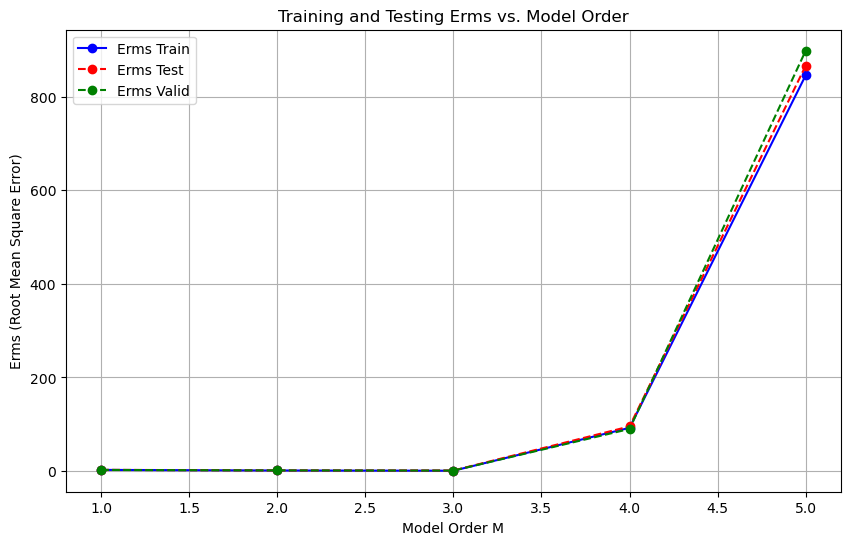

In [52]:
###################################   Error Plot for various values of M ################################
l= 0
maxm = 6
Erms_train = []
Erms_test = []
Erms_valid = []
Data_size = len(data)
for m in range(1,maxm):
    D=int(length_of_design_matrix(m,len(data[0])))
    # print(D)
    weightsi = model(target,data,m,D,len(data),l)
    act = []
    for x in data:
        act.append(predict(weightsi,x,m))
    act_test =[]
    for x in data_test:
        act_test.append(predict(weightsi,x,m))
    act_valid = []
    for x in data_valid:
        act_valid.append(predict(weightsi,x,m))
    Erms_test.append(error_rms(act_test,target_test))
    Erms_train.append(error_rms(act,target))
    Erms_valid.append(error_rms(act_valid,target_valid))

model_orders = list(range(1,maxm))
nms = len(model_orders)
    # Create the plot
i=0
for j in range(1,nms):
    if Erms_valid[j]<Erms_valid[i]:
        i=j
print("m with least Erms for validation data is ",model_orders[i])
plt.figure(figsize=(10, 6))
plt.plot(model_orders, Erms_train, marker='o', linestyle='-', color='b', label='Erms Train')
plt.plot(model_orders, Erms_test, marker='o', linestyle='--', color='r', label='Erms Test')
plt.plot(model_orders, Erms_valid, marker='o', linestyle='--', color='g', label='Erms Valid')

    # Add labels and title
plt.xlabel('Model Order M')
plt.ylabel('Erms (Root Mean Square Error)')
plt.title('Training and Testing Erms vs. Model Order')
plt.legend()
plt.grid(True)

    # Show the plot
plt.show()